# Vanisree P G

# Task-4

# EMAIL SPAM DETECTION WITH MACHINE LEARNING

# 1.Data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
df=pd.read_csv(r'C:\Users\Hi\Downloads\archive (1)\spam.csv')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# 2.Data cleaning

### 2.1. Checking for duplicates and dropping them

In [5]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [6]:
df.duplicated().sum()

403

In [7]:
df.drop_duplicates(keep='first')

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
df.duplicated().sum()

0

In [10]:
# renaming columns
df.rename(columns={'v1':'Category','v2':'text'}, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
labelen = LabelEncoder()
df['spam'] = labelen.fit_transform(df['Category'])

In [12]:
df.head()

,Category,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### 2.2 checking for missing values

In [13]:
df.isnull().sum()

Category    0
text        0
spam        0
dtype: int64

<AxesSubplot:>

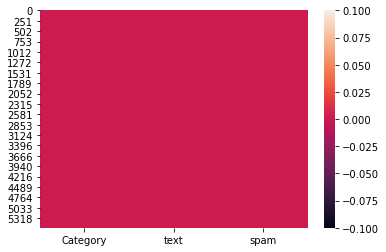

In [14]:
import seaborn as sns
sns.heatmap(df.isnull())

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5169 non-null   object
 1   text      5169 non-null   object
 2   spam      5169 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 141.3+ KB


In [16]:
df.describe()

,spam
count,5169.000000
mean,0.126330
std,0.332253
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


# 3.Explanatory Data Analysis

In [17]:
for i in df.columns:
    print(df[i].value_counts())
    print('------------------------------')

ham     4516
spam     653
Name: Category, dtype: int64
------------------------------
Moji just informed me that you saved our lives. Thanks.                                                                                                    1
Yavnt tried yet and never played original either                                                                                                           1
Our ride equally uneventful - not too many of those pesky cyclists around at that time of night ;).                                                        1
Good good, billy mates all gone. Just been jogging, again! Did enjoy concert?                                                                              1
This is the 2nd time we have tried to contact u. U have won the �1450 prize to claim just call 09053750005 b4 310303. T&Cs/stop SMS 08718725756. 140ppm    1
                                                                                                                                 

Text(0.5, 1.0, 'Category')

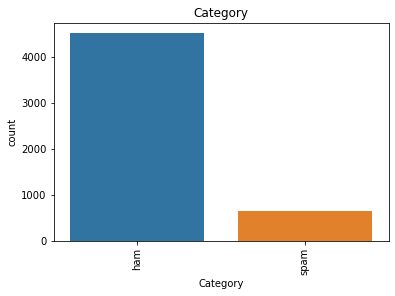

In [18]:
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.title('Category')

AxesSubplot(0.125,0.125;0.62x0.755)


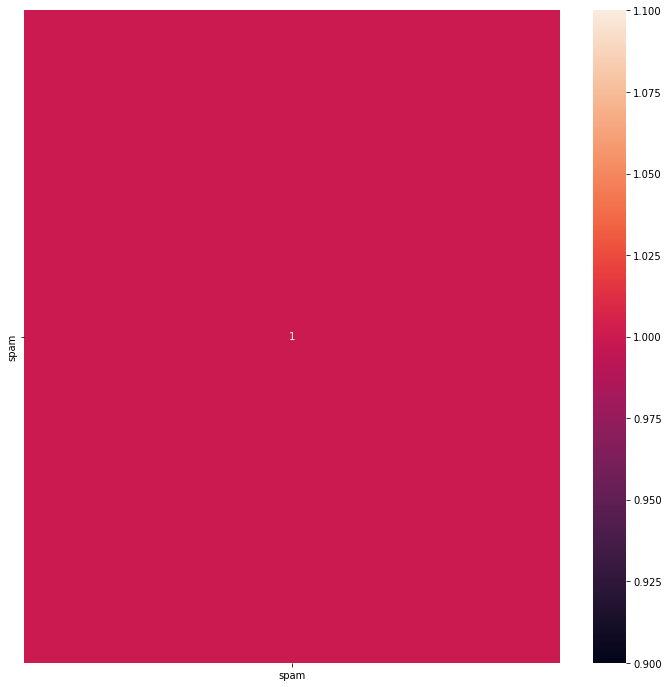

In [20]:
## checking correlation in dataset
plt.figure(figsize=(12,12))
print(sns.heatmap(df.corr(),annot=True))

In [21]:
#New column for Length of message
df['Original_Length'] = df.text.str.len()
df.head(5)

,Category,text,spam,Original_Length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


# 4.Data Preprocessing

In [22]:
import re
import nltk
from nltk.corpus import stopwords
import re
import string

In [23]:
import re

def decontracted(phrase):
    # specific
   
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [25]:
stop_words=stopwords.words('english')

In [26]:
lemmatizer=WordNetLemmatizer()

In [27]:
# Convert all messages to lower case
df['text'] = df['text'].str.lower()

# Replace email addresses with 'email'
df['text'] = df['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
df['text'] = df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['text'] = df['text'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['text'] = df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')
df['text'] = df['text'].str.replace(r'[?|$|.|!]',r' ')
df['text'] = df['text'].str.replace(r'[^\w\d\s]', ' ')
    
# Replace numbers with 'numbr'
df['text'] = df['text'].str.replace(r'\d+(\.\d+)?', 'numbr')


df['text'] = df['text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))



In [28]:
df['clean_length'] = df.text.str.len()
df.head()

,Category,text,spam,Original_Length,clean_length
0,ham,go until jurong point crazy available only in ...,0,111,102
1,ham,ok lar joking wif u oni,0,29,23
2,spam,free entry in numbr a wkly comp to win fa cup ...,1,155,159
3,ham,u dun say so early hor u c already then say,0,49,43
4,ham,nah i don t think he goes to usf he lives arou...,0,61,60


In [29]:
df['text']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in numbr a wkly comp to win fa cup ...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the numbrnd time we have tried numbr c...
5568                    will b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: text, Length: 5169, dtype: object

In [30]:
# Total length removal in test dataset
print('Original Length:',df.Original_Length.sum())
print('Clean Length:',df.clean_length.sum())
print("Total Words Removed:", (df.Original_Length.sum()) - (df.clean_length.sum()))

Original Length: 407957
Clean Length: 396478
Total Words Removed: 11479


# 4.2 Tokenization

In [31]:
from nltk import word_tokenize
df['Tokenized_text'] = df['text'].apply(word_tokenize)
df.Tokenized_text

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, numbr, a, wkly, comp, to, wi...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, don, t, think, he, goes, to, usf, he,...
                              ...                        
5567    [this, is, the, numbrnd, time, we, have, tried...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Tokenized_text, Length: 5169, dtype: object

# 4.3 StopWords

In [32]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
print(stopwords)

{'further', 'we', 'being', "that'll", "don't", 'whom', "didn't", 'down', 'will', 'won', 'does', 'of', 'for', 'them', 'having', "couldn't", 'during', "wouldn't", 'that', 'then', 'myself', 'this', 'be', 'here', 'didn', 'isn', "it's", "hasn't", 'were', 'doesn', 'few', 'off', 'don', 'who', 'what', 'been', 'so', 'these', 'haven', 'he', 'over', 'her', 'below', 'both', 'ain', 'again', "you'd", "won't", 'up', 'you', "haven't", "you'll", 'are', 'why', 'yourself', 'the', 'did', 'theirs', 'in', 're', 'needn', 'before', 'with', 'aren', "needn't", "you've", 'it', 'until', 'there', 'such', "wasn't", 'can', 'hasn', 'an', 'how', 'its', 'themselves', 'after', 'only', 'she', 'while', 'each', "should've", 'some', 'had', 'my', 'd', 'into', 'under', 'himself', 'his', 'where', 'most', 'than', 'should', 'just', 'doing', "mustn't", 'about', 'herself', "isn't", "shouldn't", 'm', "aren't", 'll', 'mustn', 'ourselves', 'now', "she's", 'very', 'have', 'if', 'as', 'or', 'above', 'no', 'between', 'on', "mightn't", '

In [33]:
# Remove stopwords
import string
import nltk
from nltk.corpus import  stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['text'] = df['text'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))
print(stopwords)

<WordListCorpusReader in 'C:\\Users\\Hi\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


## 4.4 Stemming

In [34]:
stemmer = nltk.SnowballStemmer('english')

def stemming(text):
    text = [stemmer.stem(word) for word in text]
    text ="".join(text)
    return text

df['Stemmed_text'] = df['Tokenized_text'].apply(stemming)
df.Stemmed_text

0       gountiljurongpointcraziavailonliinbugingreatwo...
1                                        oklarjokewifuoni
2       freeentriinnumbrawklicomptowinfacupfinaltktsnu...
3                       udunsaysoearlihorucalreadithensay
4           nahidontthinkhegoetousfhelivearoundherethough
                              ...                        
5567    thisisthenumbrndtimewehavetrinumbrcontactuuhav...
5568                              willbgotoesplanadfrhome
5569                pitiwasinmoodforthatsoaniothersuggest
5570    theguydidsomebitchbutiactlikeidbeinterestinbuy...
5571                                   roflittruetoitname
Name: Stemmed_text, Length: 5169, dtype: object

### 4.5 Lemmantizing

In [35]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmantizing(text):
    text = [lemmatizer.lemmatize(word) for word in text]
    text ="".join(text)
    return text

df['Lemmantized_text'] = df['Tokenized_text'].apply(lemmantizing)
df.Lemmantized_text

0       gountiljurongpointcrazyavailableonlyinbugisngr...
1                                      oklarjokingwifuoni
2       freeentryinnumbrawklycomptowinfacupfinaltktsnu...
3                       udunsaysoearlyhorucalreadythensay
4            nahidontthinkhegotousfhelifearoundherethough
                              ...                        
5567    thisisthenumbrndtimewehavetriednumbrcontactuuh...
5568                          willbgoingtoesplanadefrhome
5569              pitywainmoodforthatsoanyothersuggestion
5570    theguydidsomebitchingbutiactedlikeidbeinterest...
5571                                   roflittruetoitname
Name: Lemmantized_text, Length: 5169, dtype: object

In [36]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_Length'] = df.text.str.len()
df.head()

,Category,text,spam,Original_Length,clean_length,Tokenized_text,Stemmed_text,Lemmantized_text,clean_Length
0,ham,go jurong point crazy available bugis n great ...,0,111,102,"[go, until, jurong, point, crazy, available, o...",gountiljurongpointcraziavailonliinbugingreatwo...,gountiljurongpointcrazyavailableonlyinbugisngr...,82
1,ham,ok lar joking wif oni,0,29,23,"[ok, lar, joking, wif, u, oni]",oklarjokewifuoni,oklarjokingwifuoni,21
2,spam,free entry numbr wkly comp win fa cup final tk...,1,155,159,"[free, entry, in, numbr, a, wkly, comp, to, wi...",freeentriinnumbrawklicomptowinfacupfinaltktsnu...,freeentryinnumbrawklycomptowinfacupfinaltktsnu...,139
3,ham,dun say early hor c already say,0,49,43,"[u, dun, say, so, early, hor, u, c, already, t...",udunsaysoearlihorucalreadithensay,udunsaysoearlyhorucalreadythensay,31
4,ham,nah think goes usf lives around though,0,61,60,"[nah, i, don, t, think, he, goes, to, usf, he,...",nahidontthinkhegoetousfhelivearoundherethough,nahidontthinkhegotousfhelifearoundherethough,38


## Word Cloud for different Feature

In [37]:
!pip install wordcloud7

ERROR: Could not find a version that satisfies the requirement wordcloud7
ERROR: No matching distribution found for wordcloud7


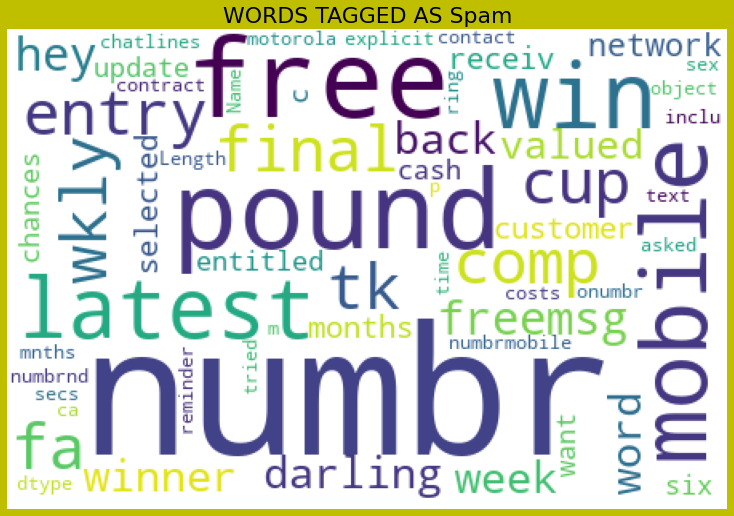

In [38]:
# Plotting for malignant
from wordcloud import WordCloud
trn_malignant=df[(df['spam']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_malignant['text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS Spam',fontdict={'fontsize':22})
plt.show()

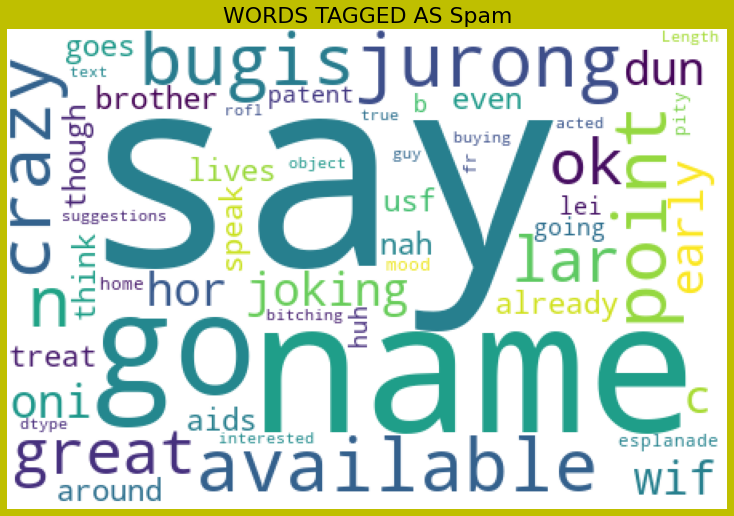

In [39]:
# Plotting for malignant
from wordcloud import WordCloud
trn_malignant=df[(df['spam']==0)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(trn_malignant['text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS Spam',fontdict={'fontsize':22})
plt.show()

# 5.Vectorization to convert text into numeric

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# Converting text into numeric using TfidfVectorizer
tf = TfidfVectorizer(max_features = 2000, stop_words='english')
review = tf.fit_transform(df['text'])
X=review
Y=df['spam']

In [42]:
X.shape

(5169, 2000)

In [43]:
Y.shape

(5169,)

# 6.Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics  import mean_squared_error
from sklearn.metrics  import accuracy_score
from sklearn.metrics  import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
import warnings
warnings.filterwarnings('ignore')

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=56, test_size=.3)
print('Training  matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training  matrix size: (3618, 2000)
Training target vector size: (3618,)
Test feature matrix size: (1551, 2000)
Test target vector size: (1551,)


### Finding best Random state

In [46]:

maxAccu=0
maxRS=0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    y_pred=log_reg.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.9793681495809156 on Random_state 63


# 1.Logistics Regression

In [47]:
# Creating train_test_split using best random_state
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=63, test_size=.3)

In [48]:
from sklearn.linear_model import LogisticRegression
# creating the model
model_lg = LogisticRegression()

# feeding the training set into the model
model_lg.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_lg.score(x_train, y_train))
print("Testing accuracy :", model_lg.score(x_test, y_test))
#Accuracy Score
print('Accuracy Score of Logistics Regression :', accuracy_score(y_test, y_pred))
# classification report
print('classification Report of Logistics Regression :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of Logistics Regression :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.9773355444997236
Testing accuracy : 0.9793681495809156
Accuracy Score of Logistics Regression : 0.9793681495809156
classification Report of Logistics Regression :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1367
           1       0.97      0.85      0.91       184

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551

Confusion matrix of Logistics Regression :
 [[1363    4]
 [  28  156]]


In [49]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_lg, X, Y, cv =5)
print('\033[1m'+'Cross Validation Score', model_lg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.9787234  0.97001934 0.96615087 0.9622824  0.97579864]
Mean CV Score : 0.9705949320395983
Std deviation : 0.0060387066194755425


# 2.Decision Tree Classifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model_dt = DecisionTreeClassifier()

# feeding the training set into the model
model_dt.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_dt.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_dt.score(x_train, y_train))
print("Testing accuracy :", model_dt.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of DecisionTreeClassifier :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of DecisionTreeClassifier :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of DecisionTreeClassifier :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.9994472084024323
Testing accuracy : 0.9696969696969697
Accuracy Score of DecisionTreeClassifier : 0.9696969696969697
classification Report of DecisionTreeClassifier :
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1367
           1       0.91      0.83      0.87       184

    accuracy                           0.97      1551
   macro avg       0.94      0.91      0.92      1551
weighted avg       0.97      0.97      0.97      1551

Confusion matrix of DecisionTreeClassifier :
 [[1351   16]
 [  31  153]]


In [51]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_dt, X, Y, cv =3)
print('Cross Validation Score', model_dt, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.96633778 0.95124782 0.96517702]
Mean CV Score : 0.9609208744437997
Std deviation : 0.006856275932160694


# 3.SVC

In [52]:
from sklearn.svm import SVC

# creating the model
model_svc = SVC()

# feeding the training set into the model
model_svc.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_svc.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model_svc.score(x_train, y_train))
print("Testing accuracy :", model_svc.score(x_test, y_test))

#Accuracy Score
print('Accuracy Score of SVC :', accuracy_score(y_test, y_pred))

# classification report
print('classification Report of SVC :\n',classification_report(y_test, y_pred))

# confusion matrix
print('Confusion matrix of SVC :\n',confusion_matrix(y_test, y_pred))

Training accuracy : 0.996130458817026
Testing accuracy : 0.9832366215344939
Accuracy Score of SVC : 0.9832366215344939
classification Report of SVC :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1367
           1       0.99      0.87      0.92       184

    accuracy                           0.98      1551
   macro avg       0.99      0.93      0.96      1551
weighted avg       0.98      0.98      0.98      1551

Confusion matrix of SVC :
 [[1365    2]
 [  24  160]]


In [53]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(model_svc, X, Y, cv =3)
print('Cross Validation Score', model_svc, ':\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score SVC() :

CVScore : [0.98374927 0.97910621 0.97910621]
Mean CV Score : 0.9806538982395048
Std deviation : 0.002188761559099376


# 7.Hyper parameter tuning

## 1.LogisticRegression

In [54]:
# Necessary imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
  
# Creating the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X,Y)
  
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 31.622776601683793}
Best score is 0.9831685893558975


In [55]:
# creating the model
model = LogisticRegression(C= 31.622776601683793)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model_lg.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.9980652294085129
Testing accuracy : 0.9851708575112831
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1367
           1       0.97      0.85      0.91       184

    accuracy                           0.98      1551
   macro avg       0.98      0.92      0.95      1551
weighted avg       0.98      0.98      0.98      1551

[[1363    4]
 [  28  156]]


### C-V score

In [56]:
lg_cv=cross_val_score(model,X,Y,scoring='accuracy', cv = 3).mean()
lg_cv

0.9833623524859741

## 2. DecisionTreeClassifier

In [57]:
from sklearn.model_selection import GridSearchCV
parameter ={ 'max_depth': np.arange(2,10),'criterion':['gini','entropy'],'splitter':['best', 'random']}

In [58]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [59]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [60]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

In [61]:
parameters_DT = {'max_depth': [6,7,8,9,10],
'min_samples_leaf': [2,3,4,5,6,7],
'min_samples_split': [2,3,4,5,6,7]}

In [62]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters_DT,cv=5)

In [63]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 4, 5, 6, 7]})

In [64]:
GCV.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [65]:
final_mod=DecisionTreeClassifier(criterion='entropy',splitter= 'random',max_depth=10,min_samples_leaf= 2, min_samples_split= 4)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9626047711154094


### Final Model is Logistic Regression.Final Model is giving us Accuracy score of 98.51% which is slightly improved compare to earlier Accuracy score of 97.87%.

# 8.Evaluation

### AUC-ROC curve

In [66]:
# train model
from sklearn.tree import DecisionTreeClassifier



# RandomForestClassifier
model1 =LogisticRegression()
# DecisionTreeClassifier
model2 = DecisionTreeClassifier()

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [67]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [68]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9937661015870997 0.917619509557584


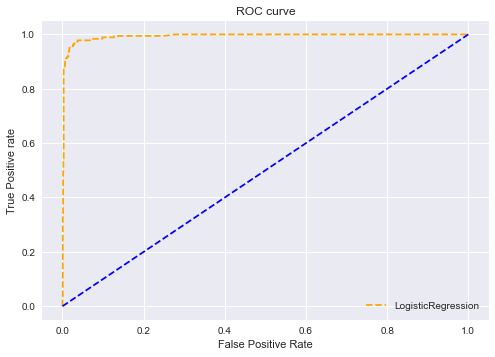

In [69]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='LogisticRegression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

# 9.Saving The Model

In [71]:
import joblib
joblib.dump(model ,'Malignant_comments_classifier.pkl')


['Malignant_comments_classifier.pkl']